In [4]:
#2.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv(r"C:\Users\Lucky\Desktop\2023 MLB Player Stats - Batting.csv", sep=';', encoding='ISO-8859-1')


# Display the first few rows of the dataset
print(data.head())


   Rk              Name  Age   Tm  Lg   G   PA   AB   R    H  ...    OBP  \
0   1        CJ Abrams*   22  WSN  NL  89  340  316  47   82  ...  0.306   
1   2        José Abreu   36  HOU  AL  95  400  368  33   90  ...  0.293   
2   3  Ronald Acuna Jr.   25  ATL  NL  97  446  391  86  129  ...  0.408   
3   4      Willy Adames   27  MIL  NL  89  383  336  44   71  ...  0.291   
4   5       Riley Adams   27  WSN  NL  23   87   79   4   22  ...  0.337   

     SLG    OPS  OPS+   TB  GDP  HBP  SH  SF  IBB  
0  0.434  0.739   105  137    5    8   3   0    0  
1  0.353  0.646    79  130   11    3   0   5    1  
2  0.578  0.986   160  226    7    4   0   2    2  
3  0.411  0.702    90  138    9    3   0   5    0  
4  0.506  0.844   133   40    4    1   1   0    0  

[5 rows x 29 columns]


In [5]:
# Display summary statistics
summary_stats = data.describe()
print(summary_stats)

# Display data types of each column
data_types = data.dtypes
print(data_types)


               Rk         Age           G          PA          AB           R  \
count  695.000000  695.000000  695.000000  695.000000  695.000000  695.000000   
mean   348.000000   28.316547   45.000000  163.297842  145.823022   19.823022   
std    200.773504    3.588799   33.889633  142.098584  126.431442   19.150896   
min      1.000000   21.000000    1.000000    0.000000    0.000000    0.000000   
25%    174.500000   26.000000   11.000000   25.000000   22.500000    2.000000   
50%    348.000000   28.000000   43.000000  135.000000  121.000000   14.000000   
75%    521.500000   31.000000   77.000000  281.000000  251.000000   34.000000   
max    695.000000   42.000000   99.000000  463.000000  418.000000   86.000000   

                H          2B          3B          HR  ...         OBP  \
count  695.000000  695.000000  695.000000  695.000000  ...  695.000000   
mean    36.109353    7.330935    0.620144    5.073381  ...    0.259964   
std     33.804909    7.451852    1.116885    6.0

<Figure size 1500x1000 with 0 Axes>

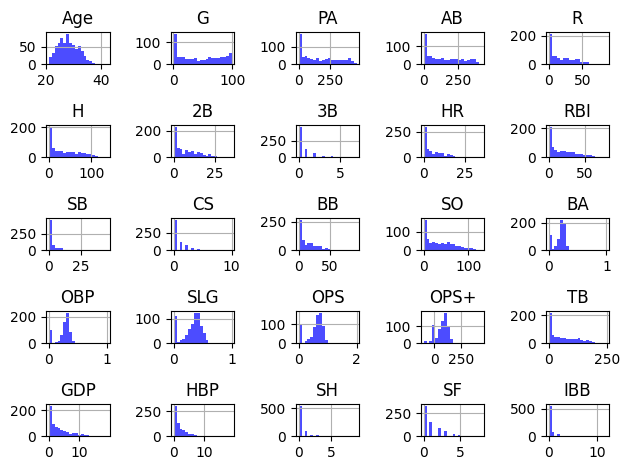

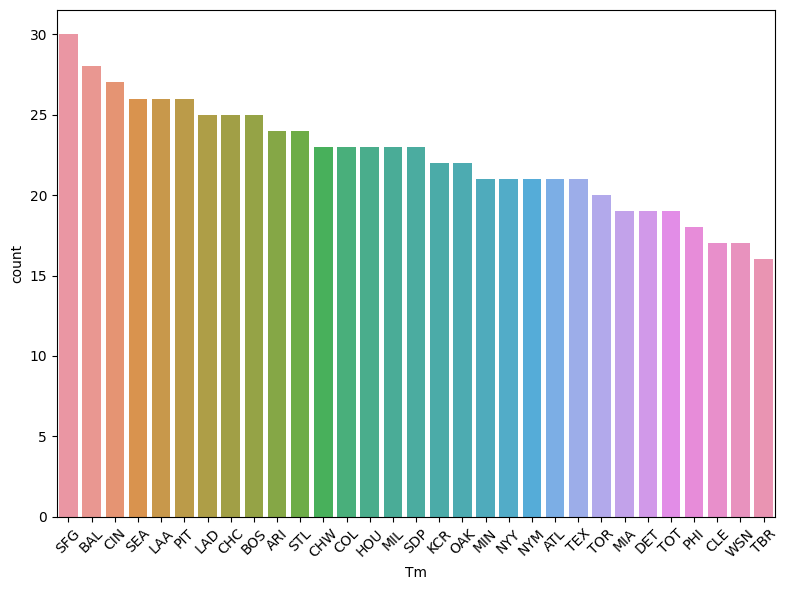

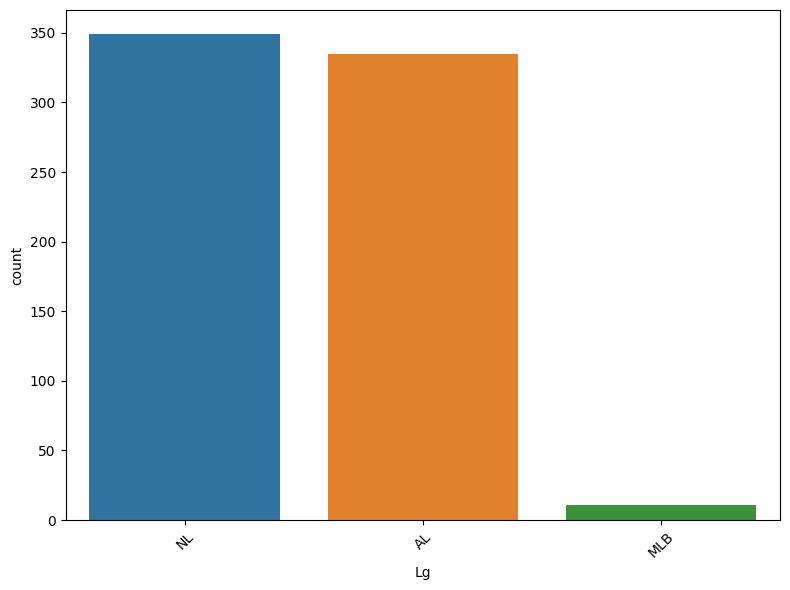

In [7]:


plt.figure(figsize=(15, 10))
data[numeric_vars].hist(bins=20, color='blue', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualize data distribution of categorical variables
categorical_vars = ['Tm', 'Lg']

for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=var, order=data[var].value_counts().index)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


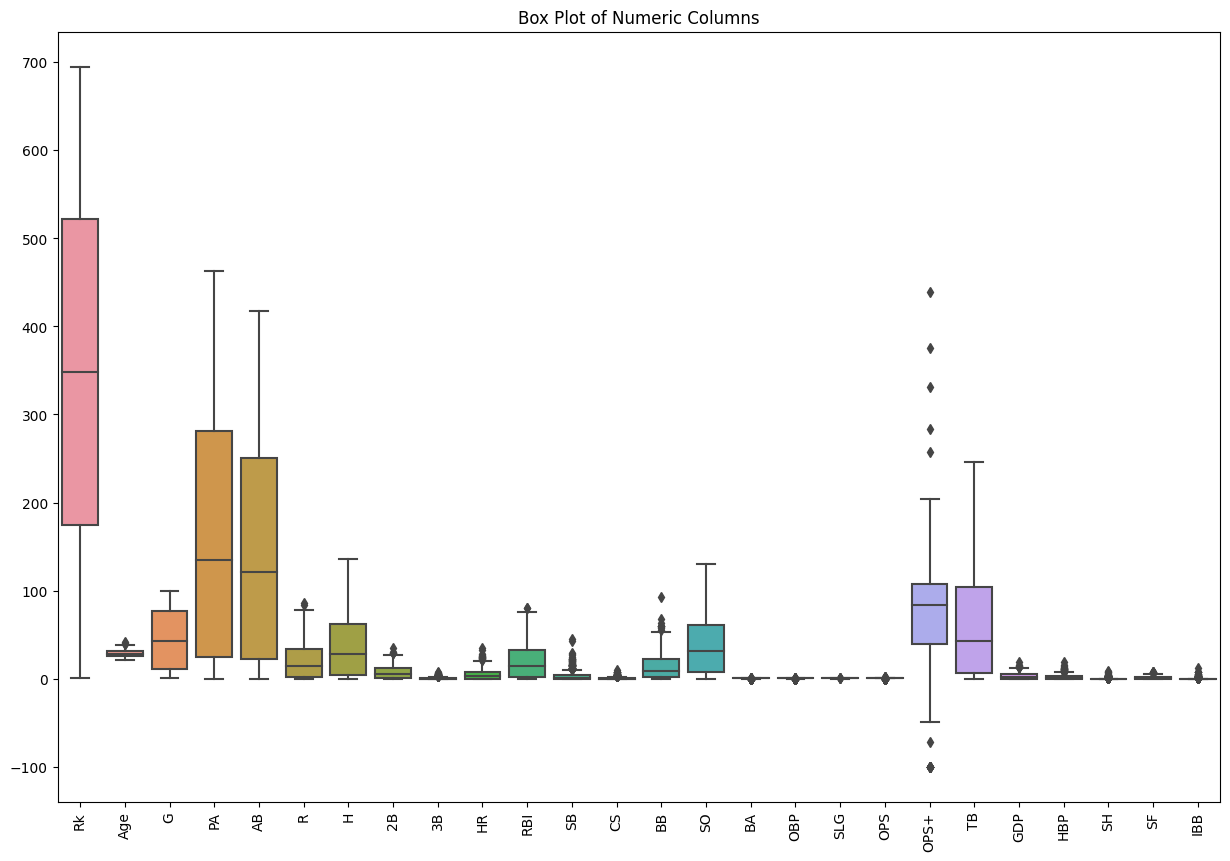

In [11]:
#3.
import numpy as np
# Select only numeric columns
numeric_columns = data.select_dtypes(include=[np.number])

# Handle missing values by filling with appropriate values (e.g., median of numeric columns)
numeric_columns.fillna(numeric_columns.median(), inplace=True)

# Check for outliers using box plots
plt.figure(figsize=(15, 10))
sns.boxplot(data=numeric_columns)
plt.title("Box Plot of Numeric Columns")
plt.xticks(rotation=90)
plt.show()


In [12]:
# Feature engineering: Calculate additional batting statistics
data['Batting_Avg'] = data['H'] / data['AB']
data['On_Base_Pct'] = (data['H'] + data['BB'] + data['HBP']) / (data['AB'] + data['BB'] + data['HBP'] + data['SF'])
data['Slugging_Pct'] = (data['H'] + 2 * data['2B'] + 3 * data['3B'] + 4 * data['HR']) / data['AB']
data['OPS'] = data['On_Base_Pct'] + data['Slugging_Pct']

# Display the modified dataset
print(data.head())


   Rk              Name  Age   Tm  Lg   G   PA   AB   R    H  ...  OPS+   TB  \
0   1        CJ Abrams*   22  WSN  NL  89  340  316  47   82  ...   105  137   
1   2        José Abreu   36  HOU  AL  95  400  368  33   90  ...    79  130   
2   3  Ronald Acuna Jr.   25  ATL  NL  97  446  391  86  129  ...   160  226   
3   4      Willy Adames   27  MIL  NL  89  383  336  44   71  ...    90  138   
4   5       Riley Adams   27  WSN  NL  23   87   79   4   22  ...   133   40   

   GDP  HBP  SH  SF  IBB  Batting_Avg  On_Base_Pct  Slugging_Pct  
0    5    8   3   0    0     0.259494     0.305638      0.531646  
1   11    3   0   5    1     0.244565     0.292500      0.418478  
2    7    4   0   2    2     0.329923     0.408072      0.705882  
3    9    3   0   5    0     0.211310     0.291339      0.508929  
4    4    1   1   0    0     0.278481     0.337209      0.632911  

[5 rows x 32 columns]


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

# Define features and target variable
features = ['Age', 'G', 'PA', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'TB', 'GDP', 'HBP', 'SH', 'SF', 'IBB',
            'Batting_Avg', 'On_Base_Pct', 'Slugging_Pct', 'OPS']
target = 'Lg'  # Predict the league

X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values in X_train and X_test
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize and train the models
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42)

rf_model.fit(X_train_imputed, y_train)
svm_model.fit(X_train_imputed, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test_imputed)
svm_predictions = svm_model.predict(X_test_imputed)

# Evaluate the models
rf_accuracy = accuracy_score(y_test, rf_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)

print("Random Forest Classifier Accuracy:", rf_accuracy)
print("SVM Classifier Accuracy:", svm_accuracy)


Random Forest Classifier Accuracy: 0.460431654676259
SVM Classifier Accuracy: 0.4460431654676259


In [15]:
# Print classification report for Random Forest Classifier
print("Random Forest Classifier:")
print(classification_report(y_test, rf_predictions))

# Print classification report for SVM Classifier
print("SVM Classifier:")
print(classification_report(y_test, svm_predictions))


Random Forest Classifier:
              precision    recall  f1-score   support

          AL       0.47      0.45      0.46        71
         MLB       0.00      0.00      0.00         1
          NL       0.45      0.48      0.46        67

    accuracy                           0.46       139
   macro avg       0.31      0.31      0.31       139
weighted avg       0.46      0.46      0.46       139

SVM Classifier:
              precision    recall  f1-score   support

          AL       0.45      0.31      0.37        71
         MLB       0.00      0.00      0.00         1
          NL       0.44      0.60      0.51        67

    accuracy                           0.45       139
   macro avg       0.30      0.30      0.29       139
weighted avg       0.44      0.45      0.43       139



C:\Users\Lucky\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lucky\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lucky\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469

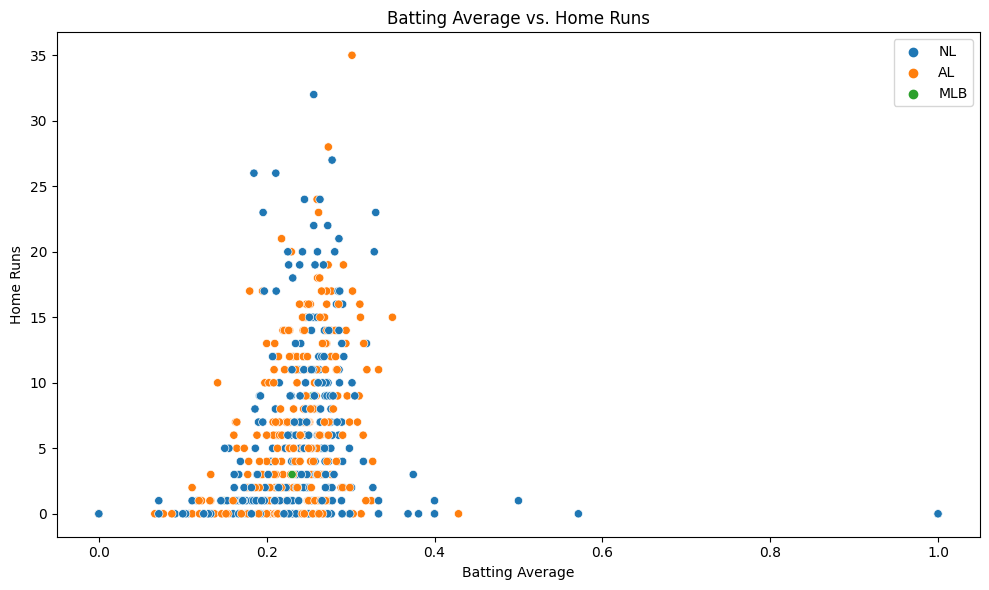

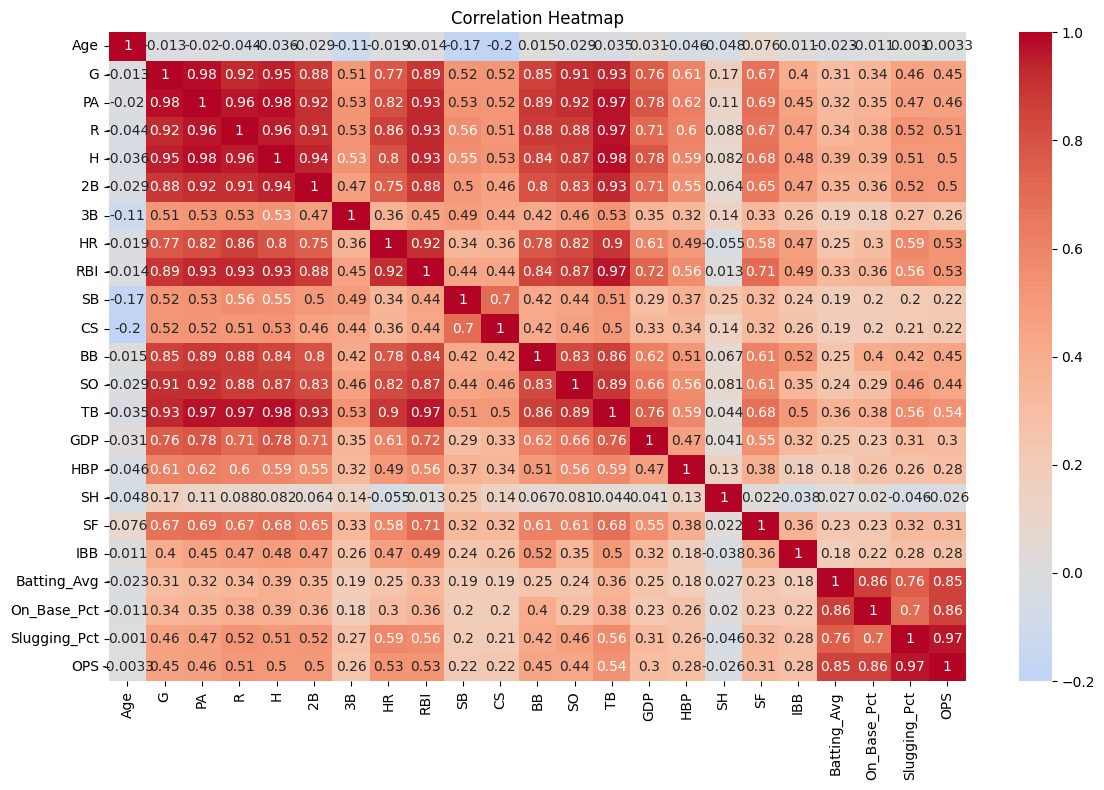

In [16]:
# Create scatter plot: Batting Average vs. Home Runs
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Batting_Avg', y='HR', hue='Lg')
plt.xlabel('Batting Average')
plt.ylabel('Home Runs')
plt.title('Batting Average vs. Home Runs')
plt.legend()
plt.tight_layout()
plt.show()

# Create heatmap of correlation matrix
correlation_matrix = data[features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


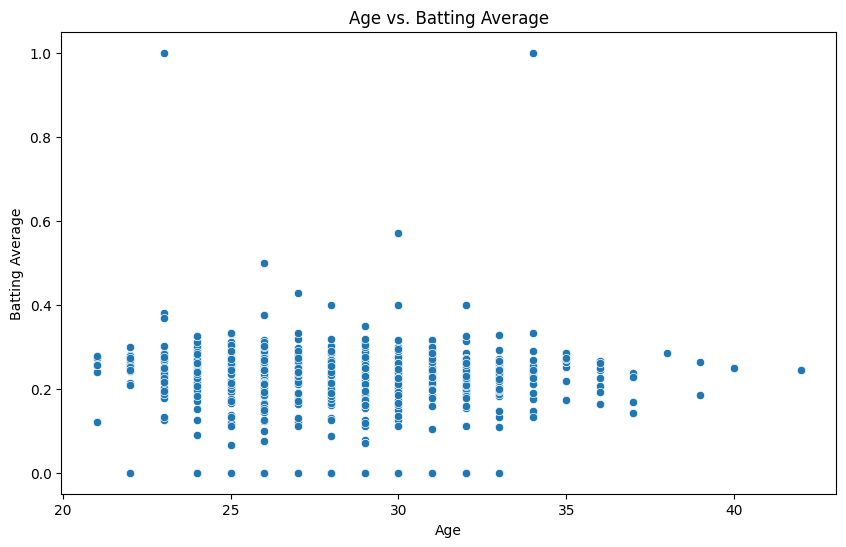

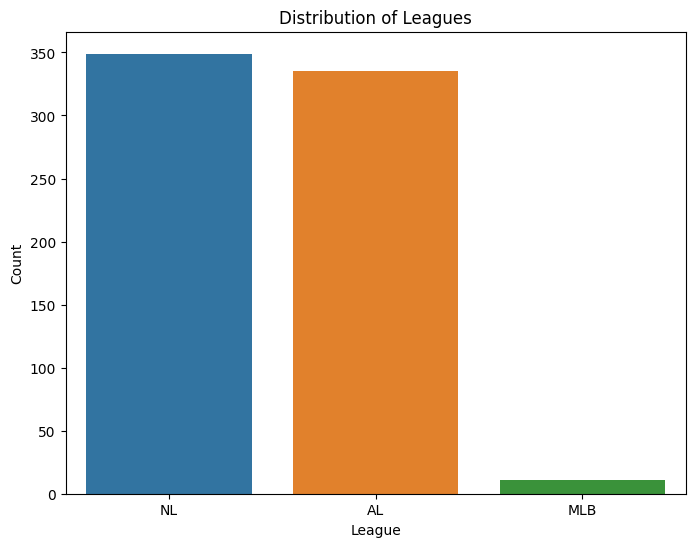

In [19]:
# Scatter plot: Age vs. Batting Average
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Batting_Avg', data=data)
plt.title('Age vs. Batting Average')
plt.xlabel('Age')
plt.ylabel('Batting Average')
plt.show()

